In [17]:
import pandas as pd
import numpy as np

movie = pd.read_excel('movie_reviews.xlsx')
df = movie.copy()
df.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,critic_rating,critic_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,89,27,74.0,68860.0


In [8]:
df.info()
# total 16638 rows, exist some missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   movie_info          16614 non-null  object        
 2   critics_consensus   8309 non-null   object        
 3   rating              16638 non-null  object        
 4   genre               16621 non-null  object        
 5   directors           16524 non-null  object        
 6   writers             15289 non-null  object        
 7   cast                16354 non-null  object        
 8   in_theaters_date    15823 non-null  datetime64[ns]
 9   on_streaming_date   16636 non-null  datetime64[ns]
 10  runtime_in_minutes  16483 non-null  float64       
 11  studio_name         16222 non-null  object        
 12  critic_rating       16638 non-null  int64         
 13  critic_count        16638 non-null  int64     

### 1. Find the number of movies that were released in theatre seach year.
• There are some erroneous values in the data
• Visualize the number of movies each year and describe what you see
• Explain what assumptions and fixes you plan to make in the data as you
move forward with your analysis

In [34]:
# view only rows with missing in_theaters_date
df[df['in_theaters_date'].isna()]
# there are 815 rows with missing date, we may consider drop it
df = df.dropna(subset=['in_theaters_date'])
df[df['in_theaters_date'].isna()]
# no missing NA

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,critic_rating,critic_count,audience_rating,audience_count,in_theatre_year


In [38]:
df['in_theaters_date'] = pd.to_datetime(df['in_theaters_date'], errors='coerce')
df['in_theatre_year'] = df['in_theaters_date'].dt.year.astype(int)

In [37]:
movies_per_year = df.groupby('in_theatre_year').size().reset_index(name='count')
movies_per_year

,in_theatre_year,count
0,1930,9
1,1931,15
2,1932,13
3,1933,23
4,1934,16
...,...,...
95,2025,8
96,2026,4
97,2027,9
98,2028,6


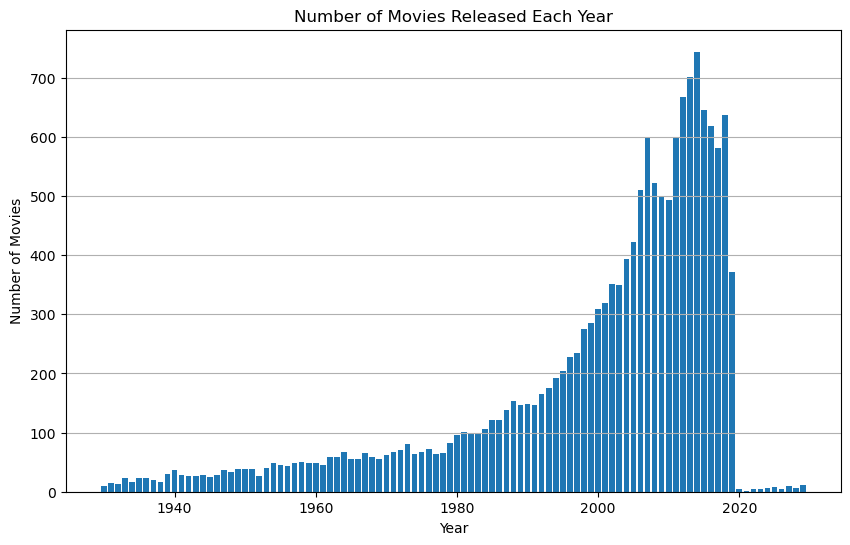

In [39]:
import matplotlib.pyplot as plt

# Plot the number of movies released each year
plt.figure(figsize=(10, 6))
plt.bar(movies_per_year['in_theatre_year'], movies_per_year['count'])
plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(axis='y')
plt.show()

We see that as time goes by, the number of movies shown in theater increases, which may due to the improvement in living standards. Especially after the 2000s, the number goes up exponentially, but with some sharp decrease during the economic crisis period (~2008).  

Since data is large, I dropped the 815 rows with missing date in this case becasue there is no general clue to inference the date in theatre. But we could use the values from on_streaming_date to impute them (may have a big difference for some movies).

### 2. Looking only at movies that were released in theatres before 2010:
• Find the 5 highest rated movies by critics (critic_rating)
• Find the 5 highest rated movies by the general audience (audience_rating)
• Take a look at the movie titles – these top movies don’t seem very popular

In [65]:
df_before_2010 = df[df['in_theatre_year'] < 2010]
df_before_2010.head()
#df_before_2010.nlargest(5, 'critic_rating')[['movie_title', 'critic_rating']]
top_critic_movies = df_before_2010.sort_values(by='critic_rating', ascending=False)[['movie_title', 'critic_rating']]
top_critic_movies.head(5)

,movie_title,critic_rating
10696,On Moonlight Bay,100
10384,A New Leaf,100
819,Red Dust,100
4227,A Charlie Brown Thanksgiving,100
466,The Gunfighter,100


In [130]:
import pickle
# Pickle the DataFrame
with open('df_before_2010', 'wb') as file:
    pickle.dump(df_before_2010, file)

In [69]:
top_audience_movies = df_before_2010.sort_values(by='audience_rating', ascending=False)[['movie_title', 'audience_rating']]
top_audience_movies.head(5)

,movie_title,audience_rating
1288,La Ciudad (The City),100.0
3196,Been Rich All My Life,100.0
215,Prima Ballerina,100.0
1800,Ice People,100.0
13133,Stop Making Sense,98.0


High critic ratings do not necessarily correlate with audience popularity. The differences in ratings might be attributed to various factors such as genre, target audience, or the specific criteria used for rating by critics and the audience.

### 3. Create a new DataFrame containing only “popular” movies that were released in theatres before 2010.
• Assume popular movies are those with more audience reviews than the average number of audience reviews of all movies before 2010
• Find the 5 highest rated movies by critics (critic_rating)
• Find the 5 highest rated movies by the general audience (audience_rating)
• Take a look at the movie titles – these top movies should make more
sense

In [73]:
# popular: >avg
average_audience_reviews = df_before_2010['audience_rating'].mean()
df_popular = df_before_2010[df_before_2010['audience_rating']>average_audience_reviews]

In [76]:
popular_critic_movies = df_popular.sort_values(by='critic_rating', ascending=False)[['movie_title', 'critic_rating']]
popular_critic_movies.head(5)

,movie_title,critic_rating
3,12 Angry Men (Twelve Angry Men),100
6016,Angst Essen Seele auf (Ali: Fear Eats the Soul),100
6064,The Fighting Seabees,100
6150,Fist of Legend (Jing wu ying xiong),100
6159,Five Graves to Cairo,100


In [78]:
popular_audience_movies = df_popular.sort_values(by='audience_rating', ascending=False)[['movie_title', 'audience_rating']]
popular_audience_movies.head(5)

,movie_title,audience_rating
1800,Ice People,100.0
215,Prima Ballerina,100.0
1288,La Ciudad (The City),100.0
3196,Been Rich All My Life,100.0
14037,The English Surgeon,98.0


### 4. Using your new DataFrame (popularmoviesreleasedintheatresbefore2010), answer the following questions about the rating column:
• What percent of movies fall under each type of rating (R, PG-13, etc.)? What are your takeaways from the summary table?
• Create a visualization that shows for each rating (R, PG-13, etc.), the average critic rating and the average audience rating. What are your takeaways from the visualization?

In [82]:
# replace PG-13) with PG-13: same category
df_popular.rating = np.where(df_popular.rating == 'PG-13)', 'PG-13', df_popular.rating)

/var/folders/g5/t835zv0x7sb7qvk1j7k7t9y40000gp/T/ipykernel_61648/2648934881.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_popular.rating = np.where(df_popular.rating == 'PG-13)', 'PG-13', df_popular.rating)


In [85]:
df_popular['rating'].value_counts(normalize=True)*100

rating
R        35.498663
NR       26.289645
PG       15.284677
PG-13    15.265571
G         7.241116
NC17      0.420329
Name: proportion, dtype: float64

We see that the rating type of R has the most largest percentage of movies, and NC17 has the smallest percent. R and NR take over half of the total popular movies before 2010. 

In [94]:
rating_summary = df_popular.groupby('rating')[['critic_rating', 'audience_rating']].mean() 
rating_summary

,critic_rating,audience_rating
rating,,
G,80.588391,78.445910
NC17,79.227273,78.363636
NR,85.102471,79.811773
PG,76.957500,78.721250
PG-13,64.197747,76.459324
R,73.058665,78.094726


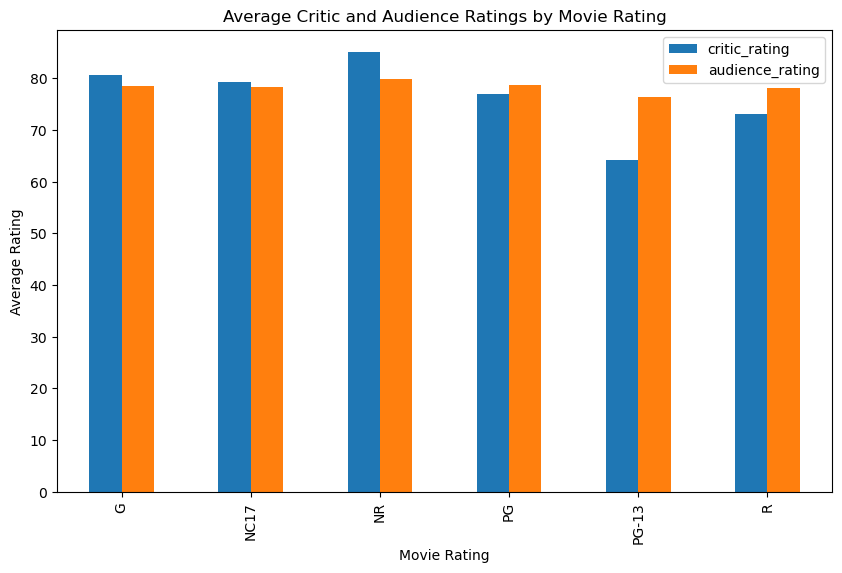

In [100]:
# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

rating_summary.plot(kind='bar', ax=ax)
ax.set(title='Average Critic and Audience Ratings by Movie Rating',
       xlabel='Movie Rating',
       ylabel='Average Rating')

plt.show()

On general, critic_rating and audience_rating has the close amount on average. Critic_rating is higher in types of G, NC17, NR, and audience_rating is higher in types of PG, PG-13, R. 

### 5. Create a pair plot of the new DataFrame. What are 3 insights you can take away from looking at the pair plot?

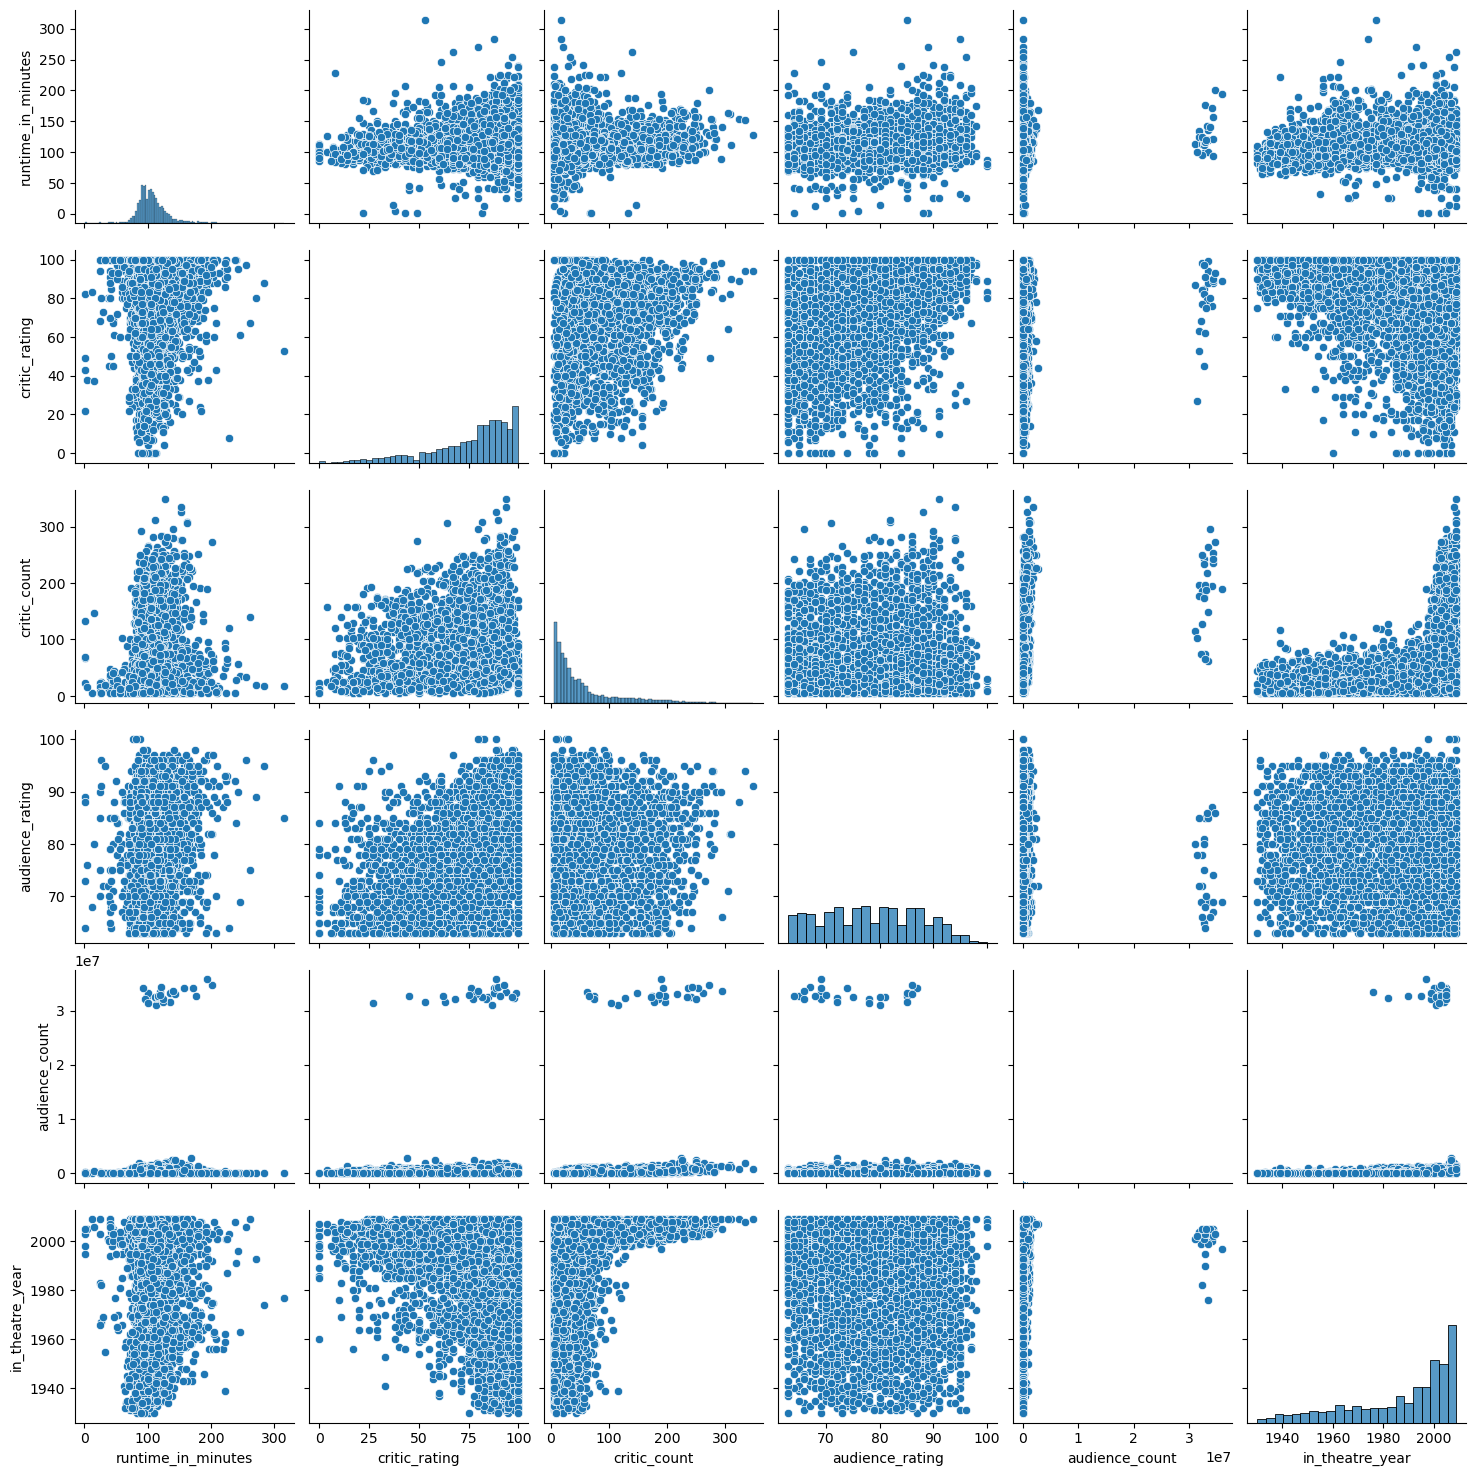

In [101]:
import seaborn as sns
sns.pairplot(df_popular);

1. critic_count is increasing as the in_theatre_year increases, which means as the time goes by, the movies shown in theatre increase so that the critic_count also increases becasue the number of people watching movies increases. (proportionally positive)

2. critic_rating is negatively proportional to in_theatre_year, which means that even though there are more movies shown in theatre later, the rating of movies tends to go down which may due to the quality. There is no 0 rating in the 1940s but appeared around the 1960s and later.

3. runtime_in_minutes are consistently concentrated within range from 100 to 200 through the years. 


### 6. Using either pandas or data visualizations, find 3 more insights using any columns in the new DataFrame.

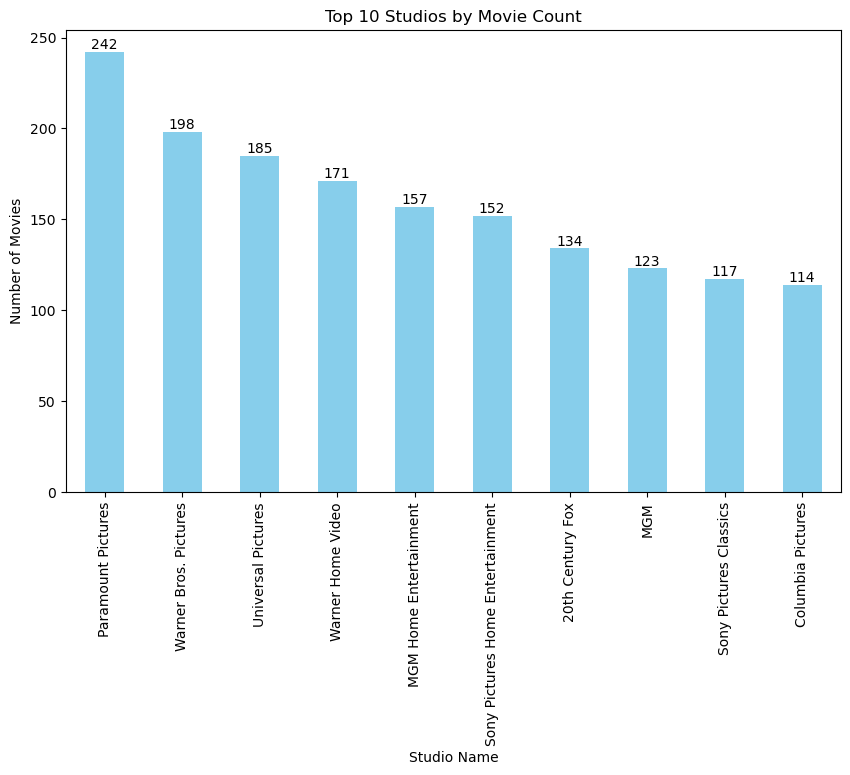

In [114]:
top_10_studio = df_popular.groupby('studio_name').size().sort_values(ascending=False).head(10)

# Plotting the bar chart with annotations
fig, ax = plt.subplots(figsize=(10, 6))
bar_plot = top_10_studio.plot(kind='bar', ax=ax, color='skyblue')

# Add annotations for each bar
for i, v in enumerate(top_10_studio):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

ax.set(title='Top 10 Studios by Movie Count',
       xlabel='Studio Name',
       ylabel='Number of Movies')

plt.show()

We see that Paramount Pictures made the largest number of popular movies among all others. 

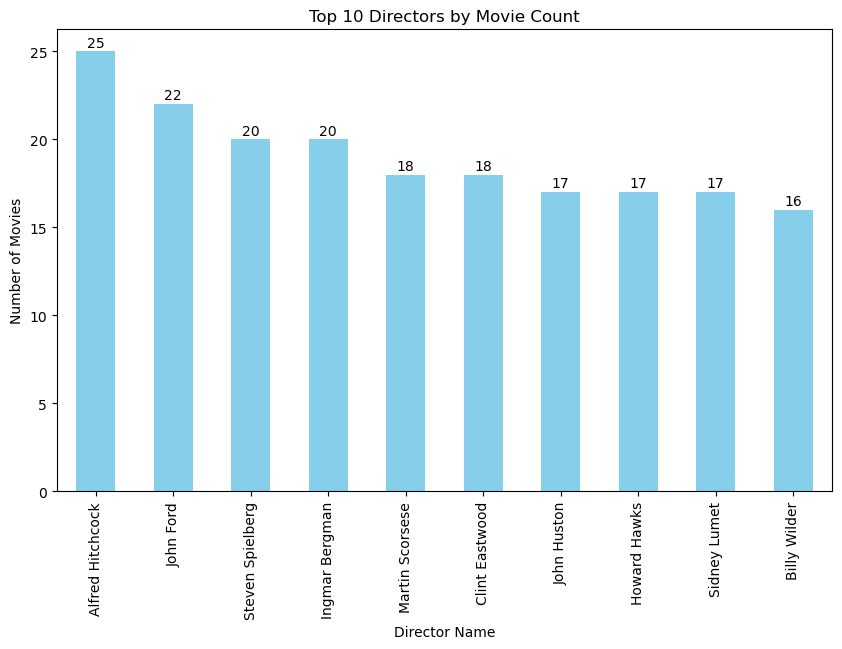

In [120]:
top_10_director = df_popular.groupby('directors').size().sort_values(ascending=False).head(10)
# Plotting the bar chart with annotations
fig, ax = plt.subplots(figsize=(10, 6))
bar_plot = top_10_director.plot(kind='bar', ax=ax, color='skyblue')

# Add annotations for each bar
for i, v in enumerate(top_10_director):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

ax.set(title='Top 10 Directors by Movie Count',
       xlabel='Director Name',
       ylabel='Number of Movies')

plt.show()

We see that director Alfred Hitchcock wrote the most number of movies, up to 25, in popular movies before 2010. 

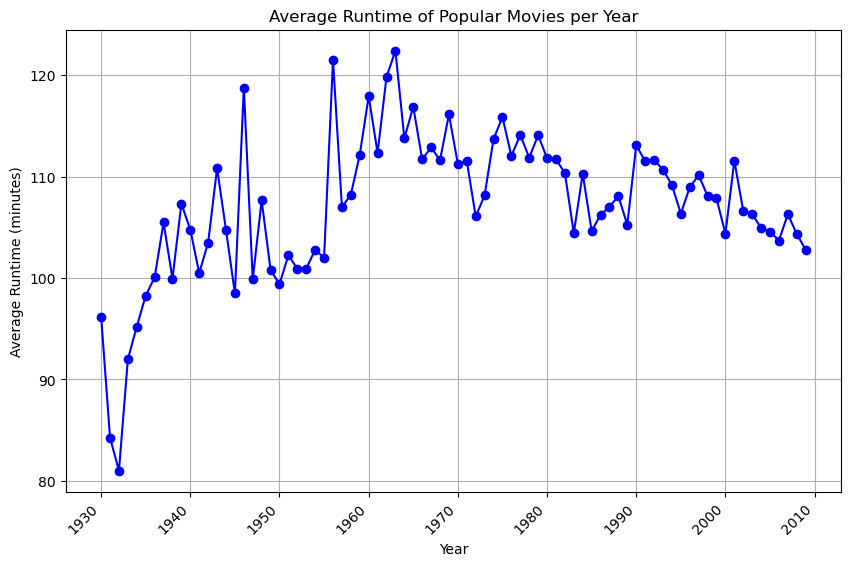

In [129]:
avg_runtime = df_popular.groupby('in_theatre_year')['runtime_in_minutes'].mean().reset_index()
# Plotting the line
plt.figure(figsize=(10, 6))
plt.plot(avg_runtime['in_theatre_year'], avg_runtime['runtime_in_minutes'], marker='o', linestyle='-', color='blue')

plt.title('Average Runtime of Popular Movies per Year')
plt.xlabel('Year')
plt.ylabel('Average Runtime (minutes)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)

plt.show()

We see that as the time goes by, the average runtime in minutes increases but tends to stablize around 100 and 110 before 2010.